# Estimating optimal coverage for SELEX libraries

SALL4 ZFC4 prefers to bind short AT-rich k-mers. Initially (Pantier et al. 2020), we sequenced our libraries at relatively low coverage ([E-MTAB-9236](https://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-9236/)) where each sample contained 20,000 reads on average. In order to determine the optimal coverage for sequencing, we resequenced the libraries with very high coveage [E-MTAB-11484](https://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-11484/) where each sample contained \~3,000,000 reads on average. To simulate varying coverages, we subsampled the reads to 500,000, 50,000 and 10,000 reads from the highly covered data set.

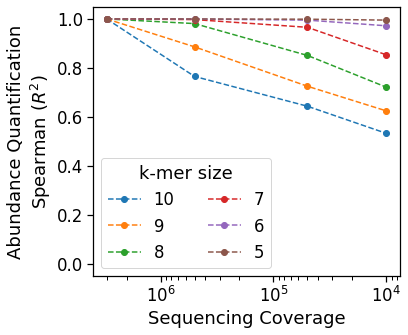

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
sns.set_context("notebook", font_scale=1.50)


df = pd.read_csv("data/spearman_r2_k_5_10.tsv", sep="\t", index_col=0)

df = df.loc[["full", "500000", "50000", "10000"]]
fig, ax = plt.subplots(figsize=(6, 5))
coverage = [3000000, 500000, 50000, 10000]
df.index = coverage
for k, c in zip([10,9,8,7,6,5], sns.color_palette("tab10")):
    ax.plot(df.index, df[str(k)].values, "o--", label=k, color=c)
ax.set_xscale("log")
ax.legend(title="k-mer size", ncol=2).set_visible(True)
ax.invert_xaxis()
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel("Sequencing Coverage")
ax.set_ylabel("Abundance Quantification\n" r"Spearman ($R^2$)")
_ = fig.tight_layout()

When we calculated k-mer abundance for $k \in 5, 6, 7, 8, 9, 10$ for all varying coverages and compared the ranks of all k-mers, we found very high correlation (Spearman $R^2$) for $k \in 5,6,7$. For a DNA binding domain which binds to short k-mers (like SALL4 ZFC4), this strongly suggests that one can sequence at relatively low coverage (\~10,000 reads on average per sample) and still get accurate quantification of k-mer abundance. We would recommend higher coverage (at least ~500,000 reads on average per sample) if one wants to investigate binding to larger k-mers.

The number of k-mers increases exponentially when $k$ increases from $5$ to $10$. Comparing abundance across varying sequencing depth for all k-mers is meaningful for proteins which bind to DNA non-specifically. For a protein which binds specifically to DNA, one can investigate the overlap of top hits.

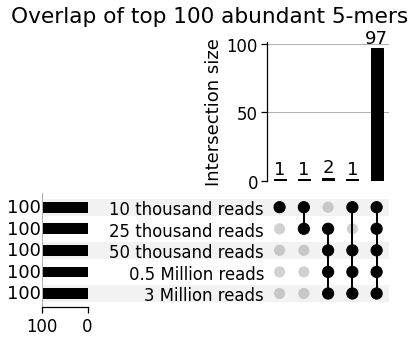

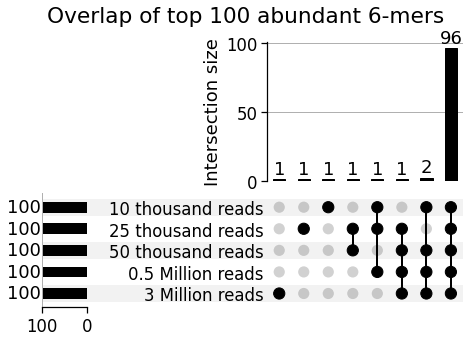

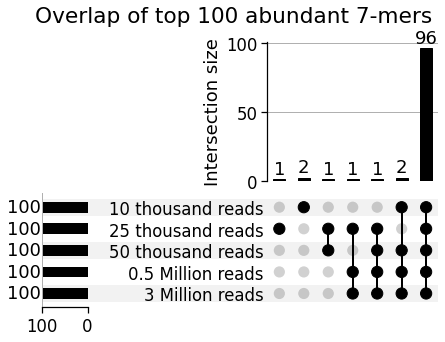

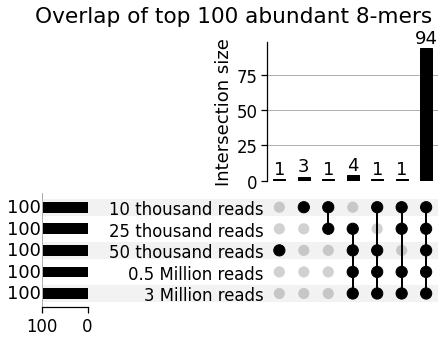

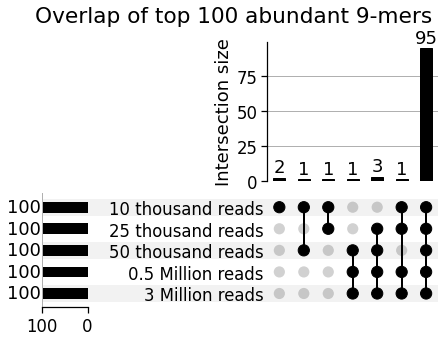

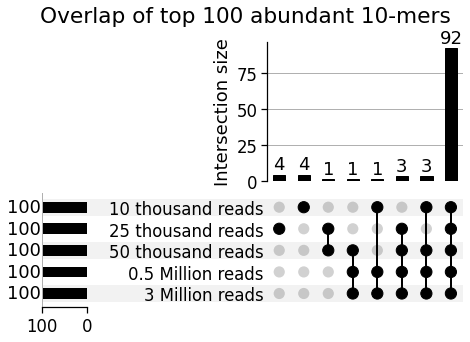

In [2]:
import pickle

from upsetplot import from_contents, UpSet
from collections import defaultdict

with open("data/top_100.pickle", "rb") as iH:
    _top_100 = pickle.load(iH)

convert = {'full': '3 Million reads', '500000': '0.5 Million reads',
           '50000': '50 thousand reads', 'miseq': '25 thousand reads',
           '10000': '10 thousand reads'}

top_100 = defaultdict(dict)
for k in [5,6,7,8,9,10]:        
    for i, j in _top_100[k].items():
        top_100[k][convert[i]] = j
    test = from_contents(top_100[k])    
    UpSet(test, subset_size='count', show_counts=True).plot()
    plt.suptitle(f"Overlap of top 100 abundant {k}-mers")

When we visualise the overlap of top 100 k-mers for $k \n 5,6,7,8,9,10$, we find that almost all of them are common at varying sequencing coverages.